# Project: Sentences similarity

## Team members:

* Khanh Duong TRAN.
* Brandon NGUELEWI TOUTSAP.

## Goal: Compare two sentences similarity by calculating Cosine similarity
### Main ideas:

#### 1. Vectorize the sentences.
#### 2. Calculate Cosine similarity.
#### 3. Compare the similarity.
#### 4. Visualization between the 2 vectors.

### We will try to compare these two sentences:

 * "The weather is hot today!"
 * "It is a hot day."

### Vectorize sentences

#### Step includes:
##### 1. Process the sentences.
##### 2. Tokenize the sentences.
##### 3. Convert into array.

##### Process the sentences:
###### Step includes:

###### 1. Remove non-word character such as punctuation, numbers, emojis, etc.
###### 2. Remove redundant spaces.
###### 3. Convert all to lower case.

In [17]:
test_string = "I haVe 20 a nAme10. :)"

In [18]:
#Remove non-word
only_w_string = ''.join(char for char in test_string if char.isalpha() or char.isspace())
print(only_w_string)

I haVe  a nAme 


In [19]:
#Remove redundant whitespace
no_space_string = ' '.join(only_w_string.split())
print(no_space_string)

I haVe a nAme


In [20]:
#Convert to lowercase
to_lower_string = no_space_string.lower()
print(to_lower_string)

i have a name


In [23]:
def process_sentence(sentence):
    """ Preprocess the sentence before converting into array.

    Argument:
    sentence: The sentence we want to preprocess.

    Output: Clean sentence.
    """
    cleaned_sentence: str = ""
    only_w: str = ''.join(char for char in sentence if char.isalpha() or char.isspace())
    no_space: str = ' '.join(only_w.split())
    to_lwer: str = no_space.lower()
    cleaned_sentence = to_lwer

    return cleaned_sentence

In [25]:
#Test the function
assert process_sentence(test_string) == "i have a name"

##### Tokenize the sentences:
###### Step includes:

###### 1. Split the sentences into each word individually.
###### 2. Create a vocabulary to vectorize.

In [7]:
test_string_2 = "my mathematics for data science project is so awesome that everybody in my class loves it"

In [24]:
#Split individually to create a vocab
words = test_string_2.split()

In [27]:
sets = set(sorted(words))

dict = {word: index for index, word in enumerate(sets)}
print(dict)

{'project': 0, 'is': 1, 'in': 2, 'it': 3, 'class': 4, 'loves': 5, 'mathematics': 6, 'science': 7, 'so': 8, 'for': 9, 'my': 10, 'data': 11, 'that': 12, 'awesome': 13, 'everybody': 14}


In [34]:
def create_vocab(sentence):
    """ Return a dictionary of vocabulary for a list of words

    Argument:
    sentence: List of words that we want to create a dictionary of vocabulary.
    """
    unique_word_set: set = set(sorted(sentence))
    vocab: dict = {word: index for index, word in enumerate(unique_word_set)}

    return vocab

In [33]:
assert create_vocab(words) == {'project': 0, 'is': 1, 'in': 2, 'it': 3, 'class': 4, 'loves': 5, 'mathematics': 6, 'science': 7, 'so': 8, 'for': 9, 'my': 10, 'data': 11, 'that': 12, 'awesome': 13, 'everybody': 14}

##### Convert into array:
###### Base on the created vocabulary to convert a sentence into an array

#### Putting all together for vectorizing the sentences
##### This section summarizes all the previous steps before proceeding to the Cosine similarity calculation.

## Calculate Cosine similarity

### The formula is:

$$
\cos(θ) =  \frac{A \cdot B}{\|A\| \times \|B\|}
$$

## Compare

### We define the threshold for the similarity is 0.5.

In [28]:
#from numpy import dot
#from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import string

def preprocess_sentence(sentence):
    sentence = sentence.lower()
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    words = sentence.split()
    return words

def create_vocabulary(sentences):
    vocabulary = set()
    for sentence in sentences:
        words = preprocess_sentence(sentence)
        vocabulary.update(words)
    return {word: index for index, word in enumerate(vocabulary)}

def vectorize_sentence(sentence, vocabulary):
    vector = [0] * len(vocabulary)
    words = preprocess_sentence(sentence)
    for word in words:
        if word in vocabulary:
            vector[vocabulary[word]] += 1
    return vector

sentences = ["This is the first sentence.", "This is the second sentence."]
vocabulary = create_vocabulary(sentences)

vector1 = vectorize_sentence(sentences[0], vocabulary)
vector2 = vectorize_sentence(sentences[1], vocabulary)

#print(vector1)
#print(vector2)
print(vocabulary)

{'second': 0, 'first': 1, 'is': 2, 'sentence': 3, 'this': 4, 'the': 5}


In [30]:
similitude = dot(vector1, vector2)/(norm(vector1)*norm(vector2))
similitude_percentage = similitude * 100
print('Degree of similarity: {:.2f}%'.format(similitude_percentage))

Degree of similarity: 80.00%


### Visualization

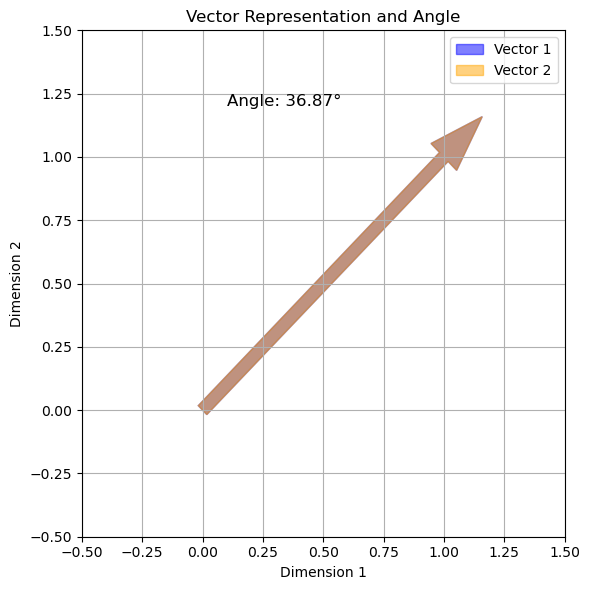

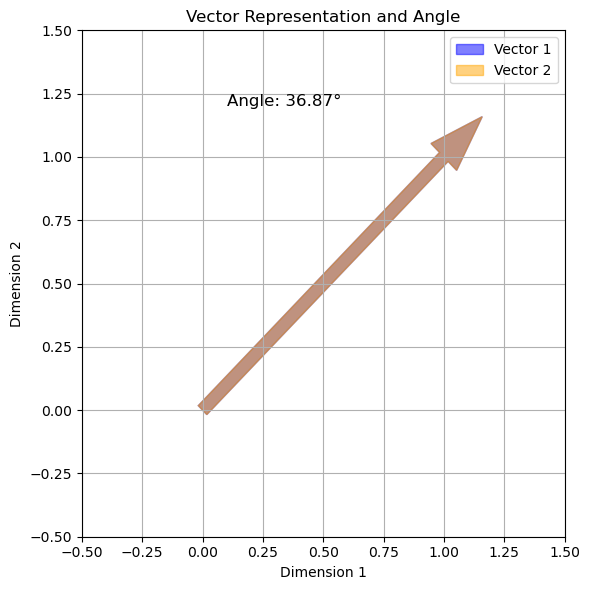

In [31]:
angle_rad = np.arccos(similitude)
angle_deg = np.degrees(angle_rad)

plt.figure(figsize=(6, 6))

# Plot Vector 1 as an arrow
plt.arrow(0, 0, vector1[0], vector1[1], color='blue', width=0.05, label='Vector 1', alpha=0.5)
# Plot Vector 2 as an arrow
plt.arrow(0, 0, vector2[0], vector2[1], color='orange', width=0.05, label='Vector 2', alpha=0.5)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

# Add the angle between vectors as text annotation
plt.text(0.1, 1.2, f'Angle: {angle_deg:.2f}°', fontsize=12)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vector Representation and Angle')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
